![top](https://raw.githubusercontent.com/callysto/callysto-sample-notebooks/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg)`

<img src="images/iStock-conductivity.jpg" width="500px" />

# Electrical Conductivity

Based on LibreTexts library experiment titled "Electical Conductivity of Aqueous Solutions" published under the [Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States](https://creativecommons.org/licenses/by-nc-sa/3.0/us/) license

## Background 


Electrical conductivity is based on the flow of electrons. Metals are good conductors of electricity because they allow electrons to flow through the entire piece of material. Thus, electrons flow like a “sea of electrons” through metals. In comparison, distilled water is a very poor conductor of electricity since very little electricity flows through water. Dissolving ions in these solutions changes this and allows electrons to travel through the solution. If the solution is able to conduct electricity, the current will be captured by a conductivity meter.

## The Question  
How does the conductivity of different solutions compare?

## The Hypothesis

Enter your hypothesis by double clicking this text.

## Materials & Equipment

* conductivity meter
* wash bottle with distilled water
* large beaker for rinsing/waste
* sodium chloride
* sugar
* tissues 

Solutions: 
* acetic acid (vinegar) 
* tap water 


## Procedure
1. Use a wash bottle with distilled water and a large beaker labeled “waste” to rinse the electrodes. Dry using a  tissue. When switched on, the meter should report 0 (or very close to it).
2. Put 50 mL of distilled water into a beaker.  
3. Place the metal tips of your conductivity tester in the solution.
4. Record the conductivity reading of the distilled water in the table below.  

5. Repeat steps 1-4 with samples of the other solutions. For example, take a spoonful of salt and dissolve it in water. After each conductivity measurement, empty the beaker and rinse it with distilled water. 

6. Clean up when done.

In [1]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
import pandas as pd
import numpy as np
import qgrid
df = pd.DataFrame(index=pd.Series(['Distilled Water', 'Tap Water', 'Salt Water', 'Vinegar']), columns=pd.Series(['Reading 1', 'Reading 2','Notes']))
df_widget = qgrid.QgridWidget(df =df, show_toolbar=True)
df_widget

A Jupyter Widget

In [3]:
from IPython.display import Javascript, display
from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))

button = widgets.Button(description="Click to save data")
button.on_click(run_all)
display(button)


A Jupyter Widget

In [4]:
output_data = df_widget.get_changed_df()

## Questions

1. Why must the electrodes on the conductivity apparatus, as well as all the beakers, be rinsed with distilled water after each conductivity test?
2. Which solution conducted electricity the best? How can you tell? 
3. Why did one solution conduct electricity better than another? 

### Answers

1.  
2.  
3.  

## Conductivity in your neighborhood
Electrical conductivity can be an important indicator of what is present in a given solution. Conductivity increases as more ions are dissolved in water. Therefore, the conductivity level can be used as an indicator for the water quality. For example, water treatment plants that process sea water and turn it into usable water use conductivity as an indicator for how well the plant removes salt from the water. In this case, a certain maximum conductivity level is set as a cutoff value for how much salt is allowed in the water before it can be used in a home or a mining operation. 

The table below shows you readings from the Rossdale Epcor water treatment plant in Edmonton over the last week. This plant supplies downtown Edmonton and the ELS region, covering the Northwest, West, and Southwest. Note that one of the quality indicators reported below is conductivity!

In [5]:
url_ELS = "http://apps.epcor.ca/DAilyWaterQuality/Default.aspx?zone=ELS"
url_RD = "http://apps.epcor.ca/DAilyWaterQuality/Default.aspx?zone=Rossdale"
table_RD = pd.read_html(url_RD, header=0)
table_ELS = pd.read_html(url_ELS, header=0)
qgrid.QgridWidget(df = table_RD[0])

A Jupyter Widget

We've taken the data from the water treatment plants along with the readings from your experiment and graphed the conductivity in the graph below. 

In [6]:
button = widgets.Button(description="Update the plot")
button.on_click(run_all)
display(button)

A Jupyter Widget

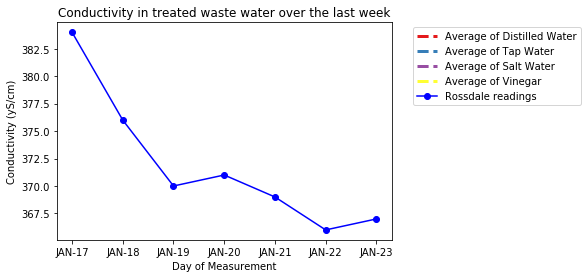

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import warnings
# ignoring runtime warning from taking the mean of a single number
# this also catches strings. 
np.warnings.filterwarnings('ignore')
cmap = cm.Set1

norm=Normalize(vmin=0, vmax=len(output_data.index)+1)

for i in range(len(output_data.index)): 
    try:
        sample_mean=np.nanmean([float(output_data.iloc[i,0]),float(output_data.iloc[i,1])])
        plt.axhline(y=sample_mean, c=cmap(norm(i)), ls='dashed', label='Average of ' + output_data.index[i], lw='3')

    except ValueError as e:
        # skip data that has strings in it. 
        continue


plt.plot(table_RD[0].iloc[6, 1:8], 'bo-', label='Rossdale readings')
#plt.plot(pd.DataFrame(table_RD[0].iloc[6, 1:8].apply(pd.to_numeric)))
plt.xlabel('Day of Measurement')
plt.ylabel('Conductivity (yS/cm)')
plt.title('Conductivity in treated waste water over the last week')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Question

4.
How do your values compare? What does this say about the water leaving the Rossdale water treatment plant? 

### Answer
4. 

![top](https://raw.githubusercontent.com/callysto/callysto-sample-notebooks/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg)